In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df= pd.read_csv("../input/covid-world-vaccination-progress/country_vaccinations.csv")

In [7]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [9]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,7.917000e+03,7.238000e+03,5.238000e+03,6.622000e+03,1.308100e+04,7917.000000,7238.000000,5238.000000,13081.000000
mean,4.325183e+06,2.903580e+06,1.385595e+06,1.269432e+05,7.371984e+04,13.956761,10.306589,5.094706,2912.016436
std,1.734505e+07,1.063639e+07,5.917575e+06,4.726085e+05,3.239413e+05,21.901770,14.571712,9.572731,4821.636296
min,0.000000e+00,0.000000e+00,1.000000e+00,-1.831400e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.427500e+04,4.792475e+04,2.208700e+04,2.888250e+03,9.050000e+02,1.150000,1.052500,0.570000,340.000000
50%,3.763700e+05,3.023795e+05,1.569640e+05,1.530750e+04,5.882000e+03,5.510000,4.300000,2.070000,1432.000000
75%,1.760453e+06,1.276900e+06,6.295110e+05,6.026000e+04,2.758000e+04,17.370000,12.880000,5.430000,3690.000000
max,2.189476e+08,1.357910e+08,8.924578e+07,7.185000e+06,5.190143e+06,199.950000,106.590000,93.360000,118759.000000


In [10]:
df.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [11]:
df["date"]= pd.to_datetime(df.date)

In [28]:
df["Total_vaccinations(count)"]= df.groupby("country").total_vaccinations.tail(1)

In [89]:
#Top countries with most vaccinations
df.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)

country
United States           218947643.0
China                   211223000.0
India                   132754608.0
United Kingdom           44450252.0
England                  37238073.0
Brazil                   35024957.0
Germany                  24286909.0
Turkey                   20728975.0
France                   18284330.0
Indonesia                17920908.0
Russia                   17218313.0
Italy                    16316820.0
Mexico                   15477517.0
Spain                    13909964.0
Chile                    13722557.0
Canada                   11158636.0
Israel                   10379693.0
United Arab Emirates     10001241.0
Poland                    9806966.0
Morocco                   8914956.0
Name: Total_vaccinations(count), dtype: float64

Text(0.5, 0, 'Total vaccinations(count)')

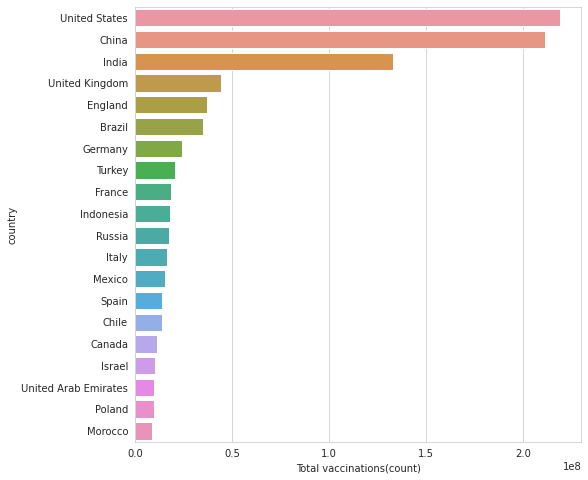

In [160]:
x= df.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)
sns.set_style("whitegrid")
plt.figure(figsize= (8,8))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Total vaccinations(count)")

In [88]:
#Top countries with fully  vaccinated peoples
df["Full_vaccinations(count)"]= df.groupby("country").people_fully_vaccinated.tail(1)

df.groupby("country")["Full_vaccinations(count)"].mean().sort_values(ascending= False).head(20)

country
United States     89245776.0
India             19170339.0
United Kingdom    11192601.0
Brazil             9683990.0
England            9346865.0
Turkey             7932297.0
Indonesia          6488197.0
Russia             6430894.0
Chile              5873211.0
Germany            5790531.0
France             5019183.0
Israel             5005417.0
Mexico             4978670.0
Italy              4787119.0
Morocco            4207298.0
Spain              3768015.0
Poland             2495838.0
Bangladesh         1967975.0
Romania            1686583.0
Hungary            1490478.0
Name: Full_vaccinations(count), dtype: float64

Text(0.5, 0, 'Fully vaccinated(count)')

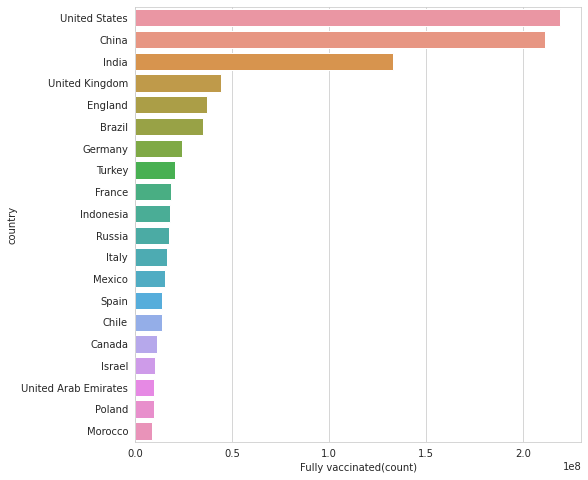

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize= (8,8))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Fully vaccinated(count)")


In [48]:
#Vaccine types
x=df.vaccines.unique()
y= list(x)
for i in y: print(i)

Oxford/AstraZeneca
Pfizer/BioNTech, Sinovac
Sputnik V
Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Pfizer/BioNTech
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Sinovac
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V
Oxford/AstraZeneca, Sinovac
Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac
Sinopharm/Beijing
Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac
Sinopharm/Beijing, Sputnik V
Moderna, Pfizer/BioNTech
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac
Oxford/AstraZeneca, Sinopharm/Beijing
Moderna, Oxford/AstraZeneca
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V
Covaxin, Oxford/AstraZeneca
Oxford/AstraZeneca, Sputnik V
Pfizer/BioNTech, Sinopharm/Beijing
Oxford/AstraZeneca, Sinovac, Sputnik V
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing
CanSino, Oxford/AstraZeneca, Pfizer/BioNTech

In [49]:
#most common vaccines
df.vaccines.value_counts()

Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          2701
Oxford/AstraZeneca                                                                    2221
Oxford/AstraZeneca, Pfizer/BioNTech                                                   1568
Pfizer/BioNTech                                                                       1333
Moderna, Pfizer/BioNTech                                                               534
Pfizer/BioNTech, Sinovac                                                               503
Oxford/AstraZeneca, Sinopharm/Beijing                                                  417
Sputnik V                                                                              371
Oxford/AstraZeneca, Sinovac                                                            362
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                           361
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                      295

<AxesSubplot:xlabel='count', ylabel='vaccines'>

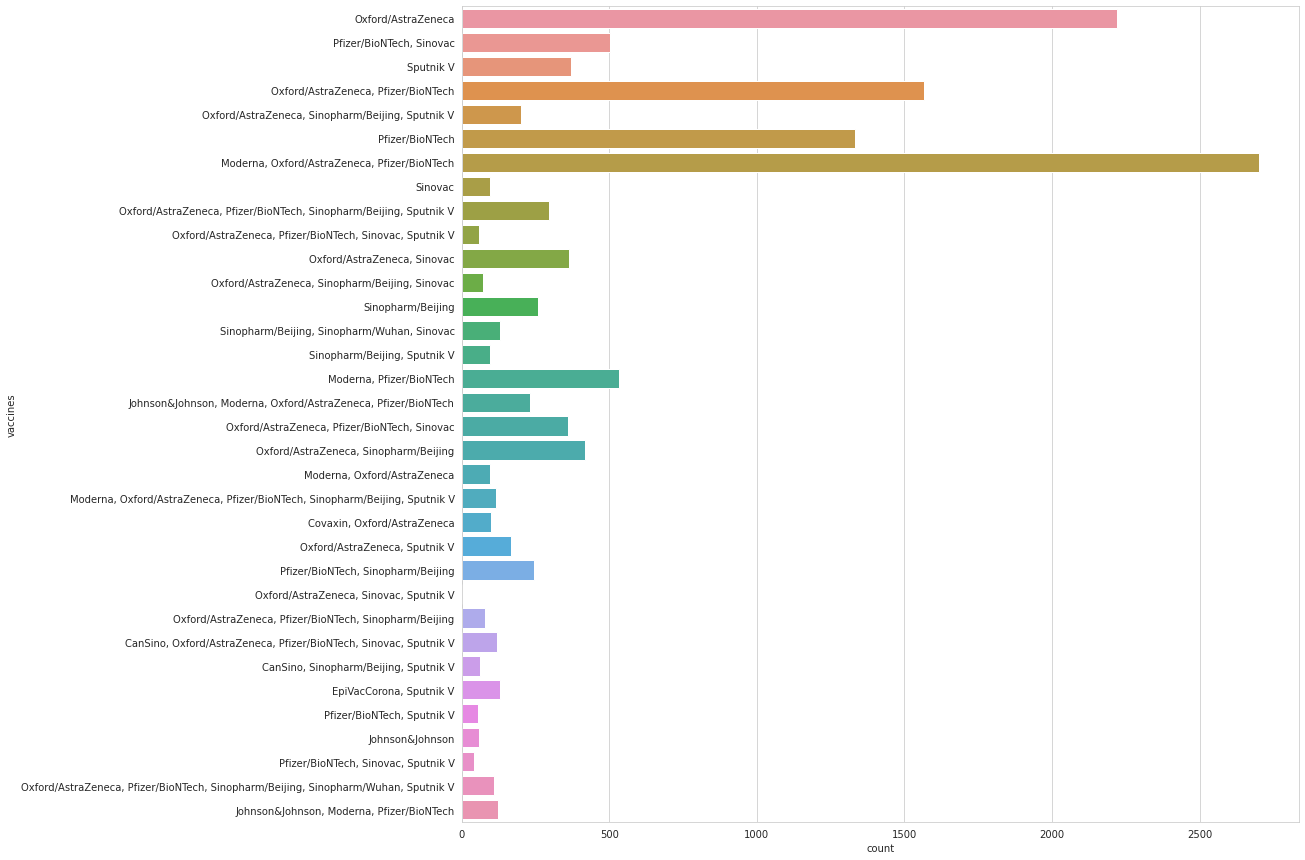

In [79]:
plt.figure(figsize=(15,15))
sns.countplot(y= "vaccines",data= df)

<AxesSubplot:xlabel='date'>

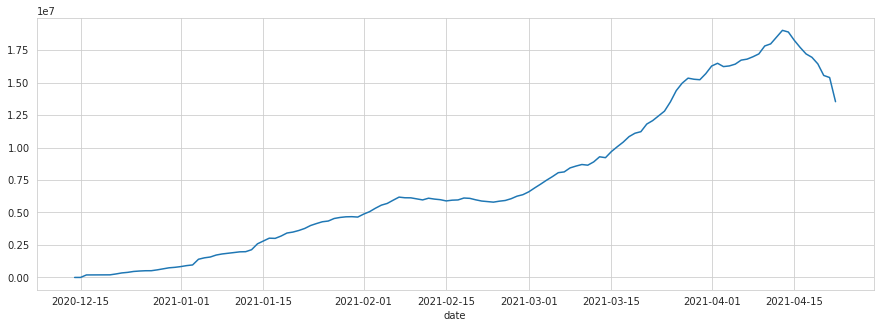

In [54]:
#daily vaccinations
x= df.groupby("date").daily_vaccinations.sum()
plt.figure(figsize= (15,5))
sns.lineplot(x.index,x.values)


<AxesSubplot:xlabel='date', ylabel='total_vaccinations'>

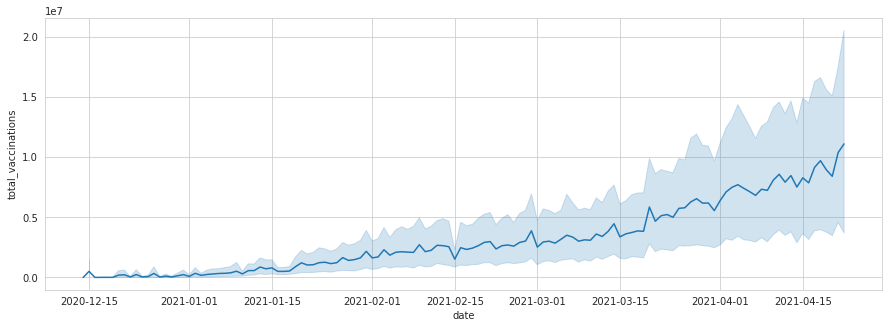

In [61]:
#total vaccinations
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations",data= df)

In [70]:
#Countries with best daily average vaccinations
x= df.groupby("country").daily_vaccinations.mean().sort_values(ascending= False).head(20)

Text(0.5, 0, 'daily vaccinations(avg)')

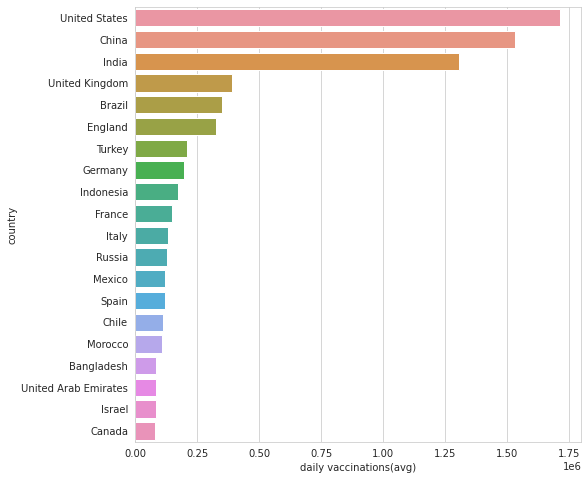

In [73]:
plt.figure(figsize= (8,8))
ax= sns.barplot(x.values,x.index)

ax.set_xlabel("daily vaccinations(avg)")

In [82]:
#vaccination per hundred top countries
df["Total_vaccinations_per_hundred"]= df.groupby("country").total_vaccinations_per_hundred.tail(1)


Text(0.5, 0, 'vaccinations per hundred')

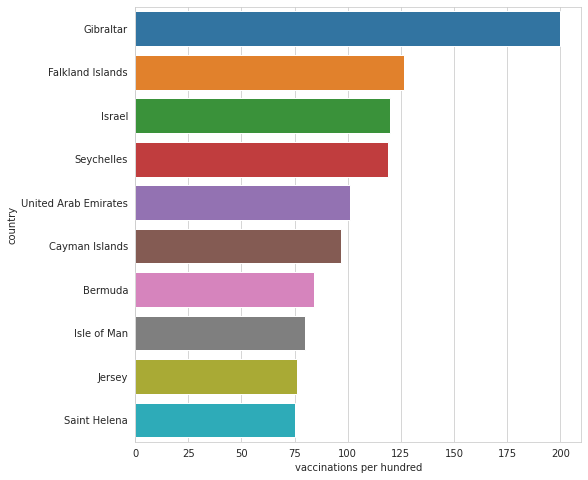

In [85]:
x= df.groupby("country")["Total_vaccinations_per_hundred"].mean().sort_values(ascending= False).head(10)
plt.figure(figsize= (8,8))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("vaccinations per hundred")

In [87]:
#daily vaccinations per million top countries
df.groupby("country")["daily_vaccinations_per_million"].mean().sort_values(ascending= False).head(20)

country
Bhutan                      35506.222222
Falkland Islands            21459.424242
Gibraltar                   20177.058824
Nauru                       15507.000000
Curacao                     13350.083333
San Marino                  12590.075472
Seychelles                  11809.450000
Saint Helena                11408.723077
Israel                       9698.000000
United Arab Emirates         8492.925234
Bermuda                      8269.555556
Cayman Islands               8269.413793
Isle of Man                  8105.890110
Turks and Caicos Islands     8058.000000
Maldives                     7855.679487
Uruguay                      7628.518519
Jersey                       7596.214286
Guernsey                     6793.430233
Wales                        6643.083333
Malta                        6529.808511
Name: daily_vaccinations_per_million, dtype: float64

<AxesSubplot:xlabel='date', ylabel='daily_vaccinations_per_million'>

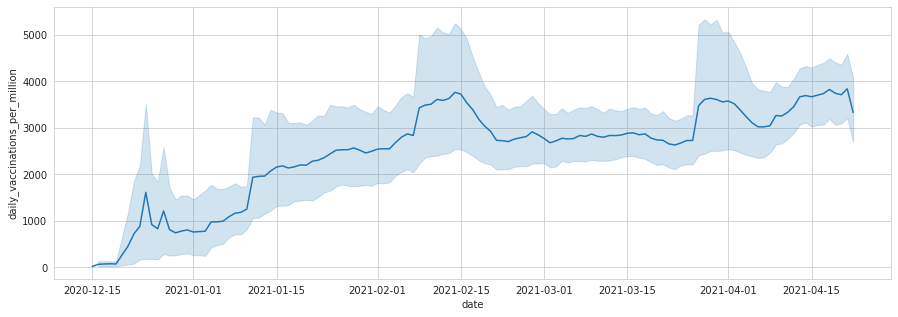

In [90]:
#daily vaccination per million 
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "daily_vaccinations_per_million",data= df)

<AxesSubplot:xlabel='date', ylabel='people_fully_vaccinated'>

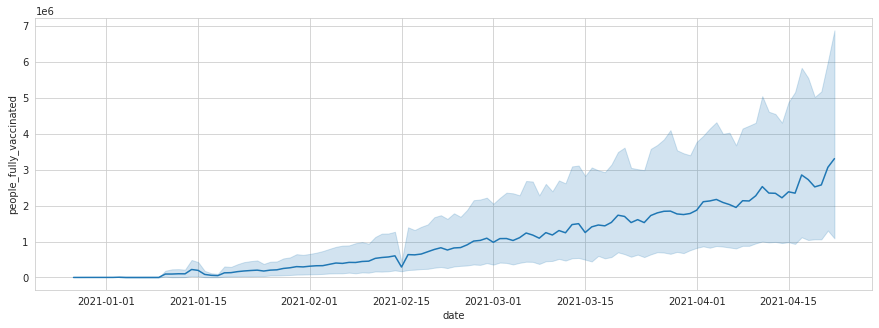

In [91]:
#people fully vaccinated
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "people_fully_vaccinated",data= df)

In [ ]:
#covid 19 vaccinations INDIA

<AxesSubplot:xlabel='date', ylabel='daily_vaccinations'>

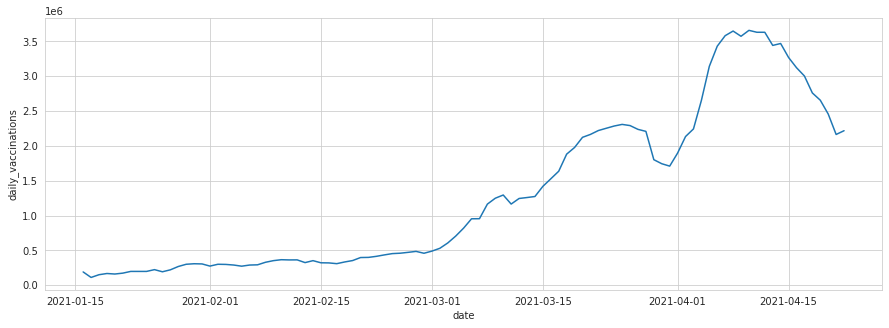

In [99]:
#daily vaccinations in India
plt.figure(figsize= (15,5))

sns.lineplot(x= "date",y= "daily_vaccinations",data= df[df.country== "India"])

<AxesSubplot:xlabel='date', ylabel='total_vaccinations'>

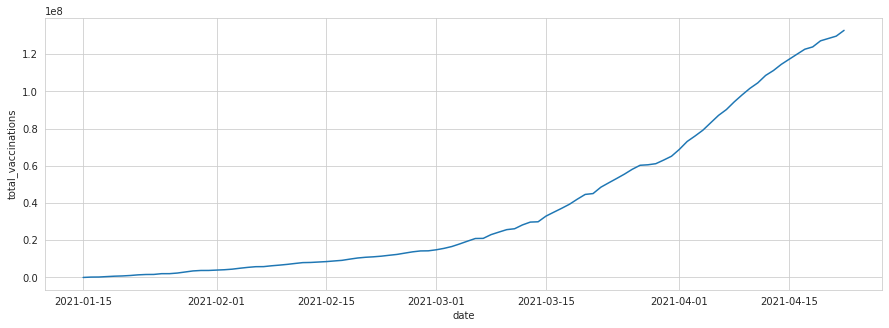

In [100]:
#Total vaccinations in India
plt.figure(figsize= (15,5))

sns.lineplot(x= "date",y= "total_vaccinations",data= df[df["country"]=="India"])

<AxesSubplot:xlabel='date', ylabel='people_fully_vaccinated'>

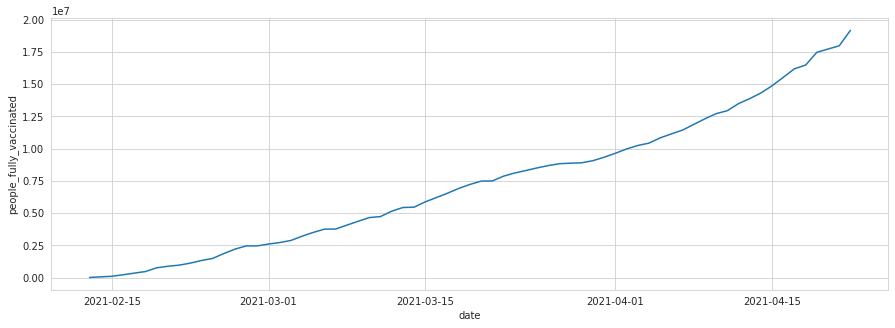

In [102]:
#full vaccinations in India
plt.figure(figsize= (15,5))

sns.lineplot(x= "date",y= "people_fully_vaccinated",data= df[df["country"]=="India"])

<AxesSubplot:xlabel='date', ylabel='people_vaccinated_per_hundred'>

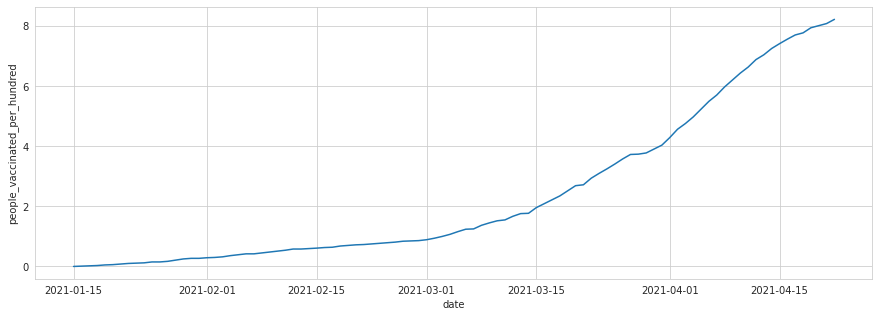

In [103]:
#people_vaccinated per hundred in India
plt.figure(figsize= (15,5))

sns.lineplot(x= "date",y= "people_vaccinated_per_hundred",data= df[df["country"]=="India"])

In [114]:
#preferred vaccine in India
x= df[df["country"]=="India"]
z= x.vaccines.value_counts()
c= list(z.index)
c


['Covaxin, Oxford/AstraZeneca']

In [ ]:
#COMPARING TOP 5 COUNTRIES WITH MOST VACCINATIONS

In [115]:
df.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head()

country
United States     218947643.0
China             211223000.0
India             132754608.0
United Kingdom     44450252.0
England            37238073.0
Name: Total_vaccinations(count), dtype: float64

In [143]:
#creating dataframe for top 5 vaccinated countries
x= df.loc[(df.country== "United States") | (df.country== "China")| (df.country== "India")| (df.country== "Unted Kingdom")|(df.country== "England")]



<AxesSubplot:xlabel='date', ylabel='total_vaccinations'>

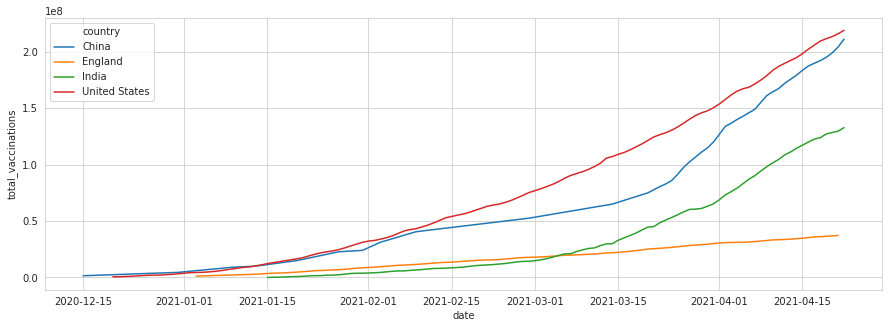

In [149]:
#total vaccination comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations" ,data= x,hue= "country")


<AxesSubplot:xlabel='date', ylabel='daily_vaccinations'>

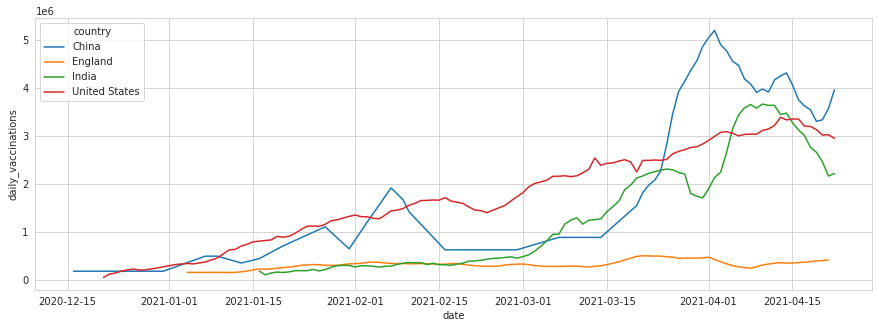

In [150]:
#daily vaccination comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "daily_vaccinations" ,data= x,hue= "country")

<AxesSubplot:xlabel='date', ylabel='people_fully_vaccinated'>

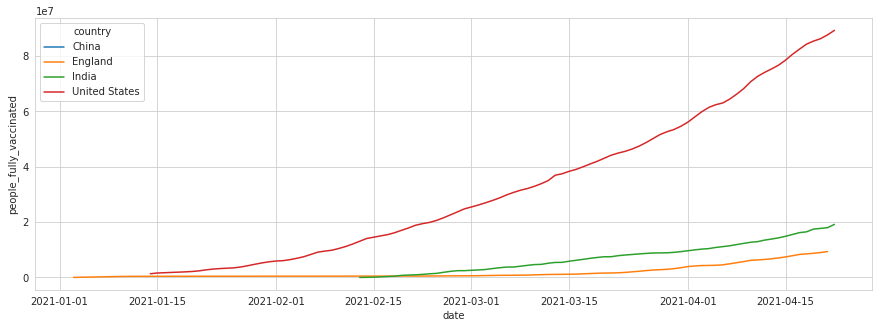

In [151]:
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "people_fully_vaccinated" ,data= x,hue= "country")

<AxesSubplot:xlabel='date', ylabel='daily_vaccinations_per_million'>

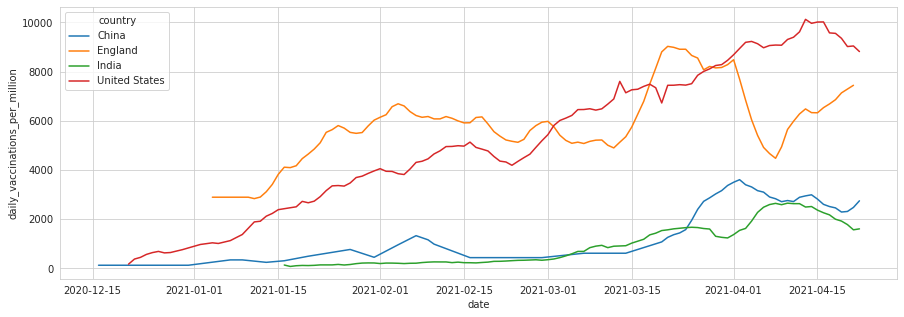

In [157]:
#daily vaccination per million comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "daily_vaccinations_per_million" ,data= x,hue= "country")

In [86]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Total_vaccinations(count),Full_vaccinations(count),Total_vaccinations_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,NaN,NaN,NaN
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,NaN,NaN,NaN
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,NaN,NaN,NaN
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,NaN,NaN,NaN
